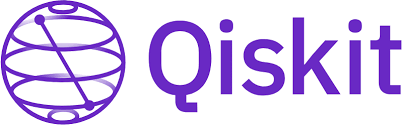

#  Using Qiskit Through the Math Framework of Quantum Mechanics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Table of Contents

- [Quantum Computing Notation](#p)<br>

- [Postulates of Quantum Mechanics](#0)
    - [📜 1. A Quantum System](#1)  
    - [🔎 2. Expected Value and Measurement Probability](#2)  
    - [🌊 3. Wave function Collapse](#3)
    - [🔗 4. Composed Systems](#4)  
        - [Computational Basis $\mathbf{|n\rangle}$](#4.1)
    - [🕰️ 5. Time Evolution](#5)
        - [Pauli Gates](#5.1)
        - [Hadamard Gate](#5.2)
        - [Phase Shift Gate](#5.3)
        
- [Massive Quantum Parallelism](#parallelism)

- [CNOT Gate](#cnot)

- [SWAP Gate](#swap)

- [$|\pm\rangle$ Bases](#alternative-bases)

- [Entanglement and Bell States](#entanglement)


<a id="p"></a>
##  Quantum Computing Notation

Before we begin, let's establish some basic notations in quantum mechanics.

<table style=" 
             margin: 20px auto; 
             border-collapse: collapse; 
             background: white; 
             box-shadow: 0px 5px 15px rgba(0, 0, 0, 0.3); 
             border-radius: 12px; 
             overflow: hidden; 
             border: 3px solid #2c3e50;">

   <tr style="background: #004080; color: white; font-size: 12px;">
        <th style="text-align: center; padding: 12px;">Operation Name</th>
        <th style="text-align: center; padding: 12px;">Symbol</th>
        <th style="text-align: center; padding: 12px;">Representation in Space</th>
   </tr>
   <tr>
        <td style="text-align: center; padding: 12px;">Ket</td>
        <td style="text-align: center; padding: 12px;">\(\left| \psi \right\rangle\)</td>
        <td style="text-align: center; padding: 12px;">\(\begin{pmatrix} \psi_1 \\ \vdots \\ \psi_n \end{pmatrix}\)</td>
   </tr>
   <tr>
        <td style="text-align: center; padding: 12px;">Bra</td>
        <td style="text-align: center; padding: 12px;">\(\left\langle \phi \right|\)</td>
        <td style="text-align: center; padding: 12px;">\((\phi_1 \quad \dots \quad \phi_n)\)</td>
   </tr>
   <tr>
        <td style="text-align: center; padding: 12px;">Bra-Ket (Inner Product)</td>
        <td style="text-align: center; padding: 12px;">\(\left\langle \psi | \phi \right\rangle\)</td>
        <td style="text-align: center; padding: 12px;">\(\mathbb{C}\)</td>
   </tr>
   <tr>
        <td style="text-align: center; padding: 12px;">Linear Operator</td>
        <td style="text-align: center; padding: 12px;">\(\left| \psi \right\rangle \left\langle \phi \right|\)</td>
        <td style="text-align: center; padding: 12px;">\(M_{n \times n}(\mathbb{C})\)</td>
   </tr>
</table>

> **Bra-Ket notation** is fundamental in quantum mechanics, reminder: $\langle \phi | \psi  \rangle = \psi_1 \overline{\phi_1} + \dots + \psi_n \overline{\phi_n}$
>* The inner product in quantum theory is homogeneous with respect to the second component.
***

<a id="0"></a>
# Postulates of Quantum Mechanics

#### Quantum mechanics is governed by five fundamental postulates that establish its mathematical framework and physical interpretation.

<hr style="height:2px; background-color:black; border:none;">

<a id="1"></a>
## 📜 1. A Quantum System  

#### A **quantum system** is represented by a **complex Hilbert space** $\mathcal{H}$,  where each **unit vector** corresponds to a quantum state.

---

####  **State**  
A quantum state is a vector $|\psi\rangle \in \mathcal{H}$ satisfying:  
$$\|\psi\| = 1.$$

---

####  **Superposition**  
If $|\varphi\rangle, |\psi\rangle \in \mathcal{H}$ are quantum states,  
then any linear combination is also a valid state:  
$$ a|\varphi\rangle + b|\psi\rangle, \quad \text{where } a, b \in \mathbb{C}, \quad |a|^2 + |b|^2 = 1. $$

---

####  **Qubit**  
The fundamental quantum states are:  
$$ |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}. $$

Any **superposition** of these states is given by:  
$$ \alpha |0\rangle + \beta |1\rangle, \quad \text{for } \alpha, \beta \in \mathbb{C}, \quad |\alpha|^2 + |\beta|^2 = 1. $$

<!-- ---

* **Quantum mechanics thrives on superposition and entanglement!** 🚀 -->


***

#### 💻 Quantum Circuit: Single-Qubit $|q\rangle$

In this quantum circuit, we will create a **quantum register** with a single qubit and represent it as the state $|q\rangle$.

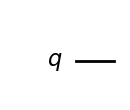

In [2]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Display the quantum circuit
qc.draw('mpl', style="clifford")

<hr style="height:2px; background-color:black; border:none;">

<a id="2"></a>
## 🔎 **2. Expected Value and Measurement Probability** 

The observable **A** is self-adjoint (and unitary) for the state $|\psi\rangle$:

$$
\langle A \rangle_\psi := \langle \psi | A | \psi \rangle = \langle \psi | \sum_j \lambda_j | e_j \rangle \langle e_j | \psi \rangle = \sum_j \lambda_j \langle \psi | e_j \rangle \langle e_j | \psi \rangle = \sum_j \lambda_j |\langle \psi | e_j \rangle|^2
$$
<p style="font-size:20px;">
    <span style="margin-right: 205px;">&nbsp;</span>
    <span style="margin-right: 485px;">&#129033;</span>
    <span >&#129033;</span>
</p>
<p style="font-size:12px;">
    <span style="margin-right: 190px;">&nbsp;</span>
    <span style="margin-right: 400px;">A – Observable</span>
    <span style="margin-right: 100px;">Measurement Probability</span>

</p>


<!-- #### 🔑 **Key Definitions**  -->

 

  > $\mathbf{|\langle \psi | e_j \rangle|^2}$ satisfies the Probability condition:  
  >1. $\sum_{j} |\langle \psi | e_j \rangle|^2 = \|\psi\|^2 = 1$ 
  >2. $|\langle \psi | e_j \rangle|^2 \geq 0$
 <br>
>
> $\mathbf{\lambda_j}$ expectation value – A measurement of the observable yields the eigenvalue (expectation value) with the probability $|\langle \psi | e_j \rangle|^2$.

---

####  **Global Phase and Ray Equivalence** 

From the definition of an observable, the equivalence class under global phase transformations is called a **Ray**:

$$
\langle A \rangle_{e^{i\alpha} \psi} = \langle e^{i\alpha} \psi | A | e^{i\alpha} \psi \rangle = e^{(i\alpha - i\alpha)} \langle \psi | A | \psi \rangle = \langle \psi | A | \psi \rangle = \langle A \rangle_{\psi}
$$

---

####  **Observations** 
1. **Self-adjoint** implies the operator corresponds to a real expectation value.
2. **Unitary transformations** preserve measurement probabilities and expectations.


<hr style="height:2px; background-color:black; border:none;">

<a id="3"></a>
## 🌊 **3. Wave function Collapse** 

If $\lambda_j$ is measured, then the state after measurement is $|e_j \rangle$.

---

#### **Wavefunction Collapse**
* When a measurement of an observable is made on a quantum system, the wavefunction **collapses** to one of the eigenstates corresponding to the measured eigenvalue.<br>
* **After Measurement**:  
  The state of the system collapses to the eigenstate $|e_j \rangle$ associated with the eigenvalue $\lambda_j$.

>#### 🔑 **Key Notes** 
>- **Collapse** is instantaneous and probabilistic, meaning that the system "chooses" one of the possible eigenstates.
>- The **probability** of measuring $\lambda_j$ is given by the square of the amplitude, $|\langle \psi | e_j \rangle|^2$.


***

#### 💻 In a quantum circuit, a measurement is represented as follows: 

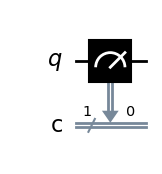

In [3]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,1)

# Measure the qubit and store the result in the classical bit
qc.measure(0,0)

# Display the quantum circuit
qc.draw('mpl', style="clifford")

> By default, the observable is the **Pauli-Z operator**.  
> After the state collapses to an eigenvector of $Z$, which is $|0\rangle$ or $|1\rangle$,  
> the information is carried by a classical bit.  

---

####  **Pauli-Z Operator** 
The Pauli-Z operator is represented as:

$$ 
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = 1|0\rangle \langle 0| - 1|1\rangle \langle 1|
$$

---

####  **Example**: 

For the state:  
$$ |q\rangle = \alpha |0\rangle + \beta |1\rangle $$  

 * When measured by the **Pauli-Z** operator with eigenvalue $\lambda = -1$ the probability:  
  $$ |\langle 1|q \rangle|^2 = \left| \left( \begin{matrix} 0 & 1 \end{matrix} \right) \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \right|^2 = |\beta|^2 $$

 * When measured by the **Pauli-Z** operator with eigenvalue $\lambda = 1$ the probability:  
  $$ |\langle 0|q \rangle|^2 = \left| \left( \begin{matrix} 1 & 0 \end{matrix} \right) \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \right|^2 = |\alpha|^2 $$



>#### 🗝️ **Key Takeaways** :
>- The measurement outcome is **1** with probability $|\beta|^2$ and **0** with probability $|\alpha|^2$.
>- The state collapses to either $|0\rangle$ or $|1\rangle$ based on the measurement.


<hr style="height:2px; background-color:black; border:none;">

<a id="4"></a>
## 🔗**4. composite Systems** 


The state space of a composite quantum system is described by the tensor product of the individual subsystems' state spaces. If the systems are numbered from 1 to $n$, and the $i$-th system is in the state $|\psi_i\rangle \in \mathcal{H}_i$, then the joint state of the entire system in the space $\mathcal{H}_0 \otimes \dots \otimes \mathcal{H}_{n-1}$ is given by:

$$
|\psi_1\rangle \otimes |\psi_2\rangle \otimes \dots \otimes |\psi_n\rangle
$$

---

####  **Tensor Product Example** 

The explicit form of the tensor product of two vectors is as follows:

$$ 
\left( a_1 |0\rangle + b_1 |1\rangle \right) \otimes \left( a_2 |0\rangle + b_2 |1\rangle \right)
= \begin{pmatrix} a_1 \\ b_1 \end{pmatrix} \otimes \begin{pmatrix} a_2 \\ b_2 \end{pmatrix}
= \begin{pmatrix} a_1 \begin{pmatrix} a_2 \\ b_2 \end{pmatrix} \\ b_1 \begin{pmatrix} a_2 \\ b_2 \end{pmatrix} \end{pmatrix}
$$



>#### 🗝️ **Key Notes** :
>- The **tensor product** creates a larger vector space by combining the individual states of each subsystem.
>- This can be extended to any dimension of the vectors, meaning it is applicable to systems of multiple qubits or higher-dimensional states.


***
<a id="4.1"></a>
###  Computational Basis $\mathbf{|n\rangle}$

The tensor product allows us to extend the definition of qubits $ |0\rangle $ and $ |1\rangle $ to any natural number $ n \in \mathbb{N} $ using the binary representation of $ n $.

#### binary representation of n:

$$
|0\rangle=|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}, 
|1\rangle=|01\rangle = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}, 
|2\rangle=|10\rangle = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}, 
|3\rangle=|11\rangle = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}
$$
***

#### 💻 **In a quantum circuit, a tensor product of two bits is represented as follows:** 

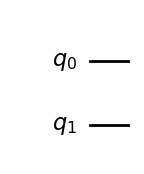

In [4]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Display the quantum circuit
qc.draw('mpl', style="clifford")

>**The Quantum Circuit Represents:**
>
>$$
|q_0\rangle \otimes |q_1\rangle
$$
>* **Explanation:**
This quantum circuit represents the **tensor product** of two quantum states $ |q_0\rangle $ and $ |q_1\rangle $. The overall state of the system is the tensor product of these two states.

<hr style="height:2px; background-color:black; border:none;">

<a id="5"></a>
## 🕰️ 5.  **Time Evolution**

The time evolution of a closed quantum system is described by a unitary operator, known as a **quantum gate**. For a state $ |\psi_0 \rangle \in \mathcal{H}^{\otimes n} $ at time $ t_0 $ and a state $ |\psi_1 \rangle \in \mathcal{H}^{\otimes n} $ at time $ t_1 $, there exists a unitary operator $ U_n: \mathcal{H}^{\otimes n} \to \mathcal{H}^{\otimes n} $ satisfying:

$$
|\psi_1 \rangle = U_n |\psi_0 \rangle
$$


* For every pure state $ |\psi\rangle \in \mathcal{H}^{\otimes n} $ and every unitary operator $ U_n \in \mathcal{U}(\mathcal{H}^{\otimes n}) $, the state $ U_n |\psi\rangle $ is also a valid state, since:

$$
\langle U_n \psi | U_n \psi \rangle = \langle \psi | \psi \rangle = 1
$$

* Unitary gates preserve the probability space.
<a id="5.01"></a>
* If $ A \in M_{2 \times 2}(\mathbb{C}) $ is a unitary observable, then a measurement in the Pauli-$ Z $ basis and a quantum  gate $ U $ are sufficient to measure in the $ A $ basis. This is because unitarity implies eigenvalues on the unit circle, and being self-adjoint ensures real eigenvalues. As a result, we obtain eigenvalues $ \pm 1 $.

$$
\langle A \rangle_{\psi} := \langle \psi | A \psi \rangle = \langle \psi | U^* Z U \psi \rangle = \langle U \psi | Z U \psi \rangle =: \langle Z \rangle_{U \psi}
$$
***
<a id="5.1"></a>
#### **Pauli Gates:**

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}, \quad
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \quad
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$
<a id="5.2"></a>
#### **Hadamard Gate:**

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
$$
<a id="5.3"></a>
#### **Phase Shift Gate:**

$$
P(\lambda) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\lambda} \end{bmatrix}
$$




#### 💻In a quantum circuit, 2D gates are represented by squares.

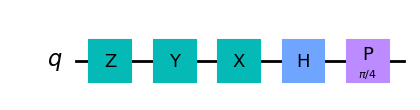

In [5]:
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Pauli-Z gate
qc.z(0)

# Apply Pauli-Y gate
qc.y(0)

# Apply Pauli-X gate
qc.x(0)

# Apply Hadamard gate
qc.h(0)

# Apply Phase Shift gate with lambda = π/4
qc.p(np.pi/4, 0)

# Display the quantum circuit
qc.draw('mpl', style="clifford")

>The circuit represents: $P(\frac{\pi}{4})HXYZ|q\rangle$

*****

#### Now we are ready to explore quantum gates that operate on more than one qubit.

We can also take the **tensor product** of quantum gates.  
**The tensor product of operators is given by:**

$$
A \otimes B =
\begin{bmatrix}
A_{11} B & \cdots & A_{1n_a} B \\
\vdots & \ddots & \vdots \\
A_{n_a1} B & \cdots & A_{n_a n_a} B
\end{bmatrix}
$$

**The tensor product of gates is itself a gate:**  
If $ A \in \mathcal{U}(\mathcal{H}_A) $ and $ B \in \mathcal{U}(\mathcal{H}_B) $, then $ A \otimes B \in \mathcal{U}(\mathcal{H}_A \otimes \mathcal{H}_B) $.  

``` This guarantees that the tensor product of unitary gates is also unitary.  ```
***

<a id="parallelism"></a>
## Massive Quantum Parallelism

#### 💻 Example: The Tensor Product of Hadamard gate applied to two qubits in a Quantum Circuit on $|00\rangle$

$$ H \otimes H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\otimes
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

* This operation creates a **superposition** of all possible computational basis states with equal probability.


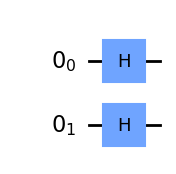

In [6]:
from qiskit import QuantumRegister

# Create a quantum register with 1 qubit
qr = QuantumRegister(2, "0")

# Create a quantum circuit with this quantum register
qc = QuantumCircuit(qr)

# Apply Hadamard gate
qc.h(0)

# Apply Hadamard gate
qc.h(1)

# Display the quantum circuit in your Jupyter Notebook
qc.draw('mpl', style="clifford")

>## Massive Quantum Parallelism
>
>This example is fundamental to many quantum algorithms. Applying the Hadamard gate $H^{\otimes n}$ (with $n = 2$) on the initial state $|00\rangle$ creates a superposition of all numbers from $|0\rangle$ to $|2^n - 1\rangle$.
>
>In the explicit form:
>
>$$
H \otimes H |00\rangle = \frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 \\
1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix}
= \frac{1}{2}
\begin{bmatrix}
1 \\
1 \\
1 \\
1
\end{bmatrix}
$$
>
>Which simplifies to:
>
>$$
= \frac{1}{2}
\left(
\begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix}
+
\begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
1 \\
0
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
0 \\
1
\end{bmatrix}
\right)
= \frac{1}{2} \left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right)
$$
>
>Or equivalently:
>
>$$
= \frac{1}{2} (|0\rangle + |1\rangle + |2\rangle + |3\rangle)
$$
>
>### Equal Probability:
>Each state in the superposition has an equal probability, and since there are 4 states, the probability for each is:
>
>$$
\left( \frac{1}{2} \right)^2 = \frac{1}{4} \quad \text{(25% for each state)}.
$$
>
>This explanation correctly communicates the creation of the superposition, the equal probability for each state, and the use of the Hadamard gate.


<a id="cnot"></a>
##  The CNOT (Controlled-X) Gate

The **CNOT gate** is a fundamental two-qubit gate that flips the target qubit **only if** the control qubit is **|1⟩**.

#### **Matrix Representation:**
$$
C\text{-}X =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

#### **How It Works:**
- If the **control qubit** is **|0⟩**, the target qubit remains unchanged.
- If the **control qubit** is **|1⟩**, the target qubit undergoes a **Pauli-X (bit-flip) operation**.

#### **State Transformations:**
$$
|00\rangle \to |00\rangle, \quad
|01\rangle \to |01\rangle, \quad
|10\rangle \to |11\rangle, \quad
|11\rangle \to |10\rangle
$$


#### 💻 CNOT Gates in a Quantum Circuit

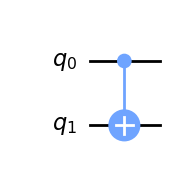

In [7]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Add a CNOT gate, with qubit 0 as the control and qubit 1 as the target
qc.cx(0, 1)

# Display the quantum circuit in your Jupyter Notebook
qc.draw('mpl', style="clifford")

>**Circuit Representation:**
>- The control qubit is represented by a **●** (dot).
>- The target qubit is represented by a **⊕** (plus sign).
***

<a id="swap"></a>
## SWAP Gate

The **SWAP** gate swaps the states of two qubits.

#### **Matrix Representation:**
$$
\text{SWAP} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}
$$

#### 💻**Constructing SWAP Using CNOT Gates**
The SWAP gate can be implemented using three **CNOT** gates:

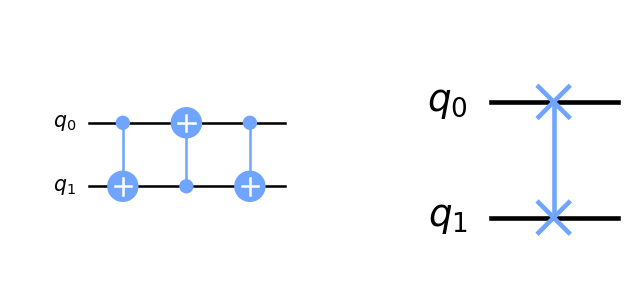

In [8]:
# Create a quantum Circuit with 2 qubits for the first 3-CNOT circuit
qc1 = QuantumCircuit(2)
qc1.cx(0, 1)
qc1.cx(1, 0)
qc1.cx(0, 1)

# Create a quantum circuit with 2 qubits for the swap gate
qc2 = QuantumCircuit(2)
qc2.swap(0, 1)

# Draw both circuits with the same figure size
fig, axs = plt.subplots(1, 2, figsize=(8, 8))  # Adjusted figure size to be the same for both

# Draw the first circuit (3-CNOT) and the second circuit (SWAP)
qc1.draw('mpl', style="clifford",ax=axs[0])  # First circuit (3-CNOT)
qc2.draw('mpl', style="clifford",ax=axs[1])  # Second circuit (SWAP)

# Display the figure with both circuits
plt.show()

>## General Controlled Gates
>
>We can also construct **general controlled gates** $U$, where a unitary operator $U$ is applied to a target qubit only when the control qubit is in a specific state.
>
>### Control on $|1\rangle$ (Standard):
A standard controlled gate applies $U$ when the control qubit is in the state $|1\rangle$.
>
>### Control on $|0\rangle$ (Inverted):
Alternatively, we can **invert the control**, meaning the gate operates when the control qubit is in $|0\rangle$ and remains **inactive** when the control qubit is in $|1\rangle$.
***

<a id="alternative-bases"></a>
## Alternative Bases: The $ |+\rangle $ and $ |-\rangle $ States

In addition to the standard qubit states $ |0\rangle $ and $ |1\rangle $, there exist **other useful bases** in quantum computing.

#### **The Hadamard Basis**
Applying the **Hadamard gate** $ H $ to $ |0\rangle $ and $ |1\rangle $ gives the **superposition states**:

$$
H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

$$
H|1\rangle = |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

#### 💡 **Why Are These Important?**
- The **$ |+\rangle $ and $ |-\rangle $ states** form an alternative basis, often used in **quantum algorithms**.
- They play a crucial role in **quantum error correction** and **quantum cryptography** (e.g., BB84 protocol).


***

<a id="entanglement"></a>
## Entanglement and Bell States

From the gates we've explored so far, we notice a fascinating phenomenon in quantum mechanics called **entanglement**. One of the most common ways to demonstrate entanglement is through the **Bell states**.

#### **Bell States Creation**

A Bell state is a maximally entangled quantum state of two qubits. The following quantum circuit demonstrates how to generate the four Bell states from the initial state $ \left|00\right\rangle $, $ \left|01\right\rangle $, $ \left|10\right\rangle $, and $ \left|11\right\rangle $.

- **Step 1: Initialize** both qubits in the state $ \left|ij\right\rangle$ where $i,j \in \{0,1\}$.
- **Step 2: Apply a Hadamard gate** to the first qubit, creating a superposition.
- **Step 3: Apply a CNOT gate**, where the first qubit acts as the control and the second qubit as the target, creating the entangled state.

The resulting Bell states are:

1. **$ \left|\Phi^+\right\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) $**
2. **$ \left|\Phi^-\right\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) $**
3. **$ \left|\Psi^+\right\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $**
4. **$ \left|\Psi^-\right\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle) $**

<!-- #### 🔑 **Why Bell States?**
- These states are **maximally entangled**, meaning the qubits share quantum information such that the state of one qubit instantly influences the state of the other.
- Bell states are foundational in quantum information theory, including **quantum teleportation**, **quantum key distribution**, and **quantum computing**.

### 🔹 Improvements:
1. **Clarified the procedure** to create the Bell states.
2. **Structured the content** for easier understanding.
3. **Formatted mathematical expressions** for better readability. -->
#### 💻 circuit creates the 4 Bell states from the initial state

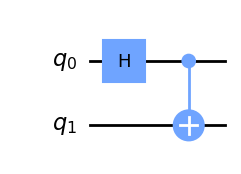

In [9]:
# Create a quantum circuit with 2 qubit
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

# Display the quantum circuit
qc.draw('mpl', style="clifford")

>**Representing the Bell Circuit Matrix**
>
>The Bell state circuit can be represented by the following matrix:
>
>$$
C\text{-}X (H \otimes I) = \frac{1}{\sqrt{2}}  
\begin{bmatrix}  
1 & 0 & 1 & 0 \\  
0 & 1 & 0 & 1 \\  
0 & 1 & 0 & -1 \\  
1 & 0 & -1 & 0  
\end{bmatrix}
$$
>
>**Example: $ \left|\Phi^+\right\rangle $:**
>
>$$
C\text{-}X (H \otimes I) |00\rangle = \frac{1}{\sqrt{2}} \left[ \begin{matrix} 1 \\ 0 \\ 0 \\ 1 \end{matrix} \right] = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)\neq |v\rangle \otimes |u\rangle
$$
>* There are no two qubits so the Bell basis is a tensor of V and U, that this is not a simple tensor product of individual states.
>
>
>**Entanglement and Non-locality**
>
>- **Entanglement** is the phenomenon where qubits become linked, so that the state of one qubit determines the state of the other, regardless of distance.
>- In the example above, measuring the first qubit immediately gives information about the second qubit. If the first qubit is measured as $ 0 $, the second qubit is also $ 0 $, and similarly for $ 1 $.
>- This is what makes entanglement **non-local**, meaning that the measurement of one qubit seems to affect the state of the other qubit, even if they are far apart.
> 
>``` This spooky action at a distance is one of the hallmarks of quantum mechanics.```
*** 


### We are ready to explore a quantum algorithm! 

The **No-Cloning Theorem** states that it is **impossible** to make an identical copy of an arbitrary unknown qubit.  
However, **quantum teleportation** allows for the transfer of a qubit's state without cloning. 

# 💻 Quantum teleportation

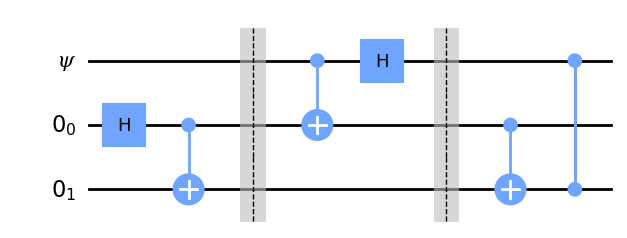

In [10]:
q_for_transfer = QuantumRegister(1, "𝜓")
q_for_bell = QuantumRegister(2, "0")

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(q_for_transfer,q_for_bell)

# Step 1: Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 2: Apply Bell* on qubits 0 and 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()


# Step 3: Apply conditional operations on qubit 2
qc.cx(1, 2)
qc.cz(0, 2)

# Draw the circuit
qc.draw('mpl', style="clifford")


>## Quantum Teleportation Protocol 🚀
>
>### 1️⃣ Initial State
>We start with the state:  
$$ |\psi\rangle = \alpha |0\rangle + \beta |1\rangle $$  
>
>### 2️⃣ Entanglement Creation 🔗  
The first step is to entangle the second and third qubits in the **Bell state**:  
$$
|\psi\rangle \otimes \left|\Phi^+\right\rangle = 
$$
Expanding this in [Computational Basis](#4.1), we obtain:  
$$
(\alpha |0\rangle + \beta |1\rangle) \otimes \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) =\frac{1}{\sqrt{2}} (\alpha |000\rangle + \alpha |011\rangle + \beta |100\rangle + \beta |111\rangle).
$$
>
>#### 3️⃣ Bell Measurement   
Next, we apply a **CNOT gate** as in the circuit:  
$$
\frac{1}{\sqrt{2}} (\alpha |000\rangle + \alpha |011\rangle + \beta |110\rangle + \beta |101\rangle).
$$ 
Applying a **Hadamard gate (H) on the first qubit**, we obtain:  
$$
\frac{1}{2} (\alpha |000\rangle + \alpha |011\rangle + \alpha |100\rangle + \alpha |111\rangle + \beta |001\rangle + \beta |010\rangle - \beta |101\rangle - \beta |110\rangle).
$$
>
>#### 4️⃣ Classical Communication and Corrections 🎯  
Now, we apply a **controlled-X (C-X) gate** as in the circuit:  
$$
\frac{1}{2} (\alpha |000\rangle + \alpha |100\rangle + \alpha |010\rangle + \alpha |110\rangle + \beta |011\rangle - \beta |111\rangle + \beta |001\rangle - \beta |101\rangle).
$$
Then, we apply a **controlled-Z (C-Z) gate**:  
$$
\frac{1}{2} (\alpha |000\rangle + \alpha |100\rangle + \alpha |010\rangle + \alpha |110\rangle + \beta |011\rangle + \beta |111\rangle + \beta |001\rangle + \beta |101\rangle).
$$
>
>#### 5️⃣ Final State 🏁  
Regardless of the measurement outcome, the coefficient of the **third qubit** is **$\alpha$** for **$\left|0\right\rangle$** and **$\beta$** for **$\left|1\right\rangle$** (all with a **positive sign**).  
Thus, **independent of measurement**, we successfully reconstruct **$\left|\psi\right\rangle$**! 🎉


## 💻 **Measurement Postponement Principle**

Instead of measuring immediately, we **postpone measurement** and observe how the system evolves.  
This illustrates the **measurement deferral principle** in quantum mechanics, which suggests that measurements can be delayed to avoid collapsing the quantum state prematurely.


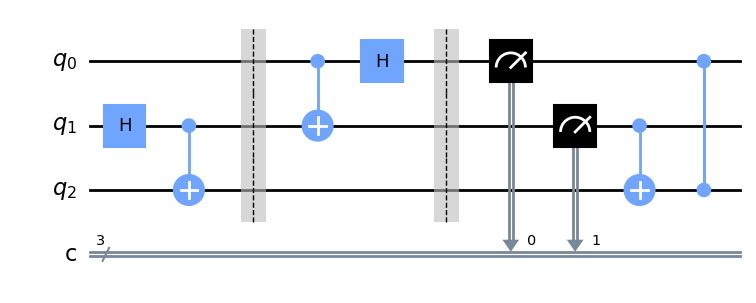

In [11]:
# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Step 1: Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 2: Apply Bell measurement on qubits 0 and 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, 0)
qc.measure(1, 1)


# Step 3: Apply conditional operations on qubit 2
qc.cx(1, 2)
qc.cz(0, 2)


# Draw the circuit
qc.draw('mpl', style="clifford")

>#### 3️⃣ State Before Measurement 🔍  
At this stage, the system is in the following quantum state:  
$$
\frac{1}{2} (\alpha |000\rangle + \alpha |011\rangle + \alpha |100\rangle + \alpha |111\rangle + \beta |001\rangle + \beta |010\rangle - \beta |101\rangle - \beta |110\rangle).
$$
>
>#### 4️⃣ Measurement and Conditional Gates 🎯  
We now perform **measurements on the first and second qubits**.  
Based on these measurement outcomes, we determine the state of the **target qubit (third qubit)**  
and apply the appropriate **controlled gates** to recover **$\left|\psi\right\rangle$** in the target qubit.  
>
>The results are summarized in **Table 2**:  
>
>| **Measurement Result** | **State of Target Qubit** | **Controlled Gates Applied** |
|----------------|--------------------------------|-----------------------------|
| **$\left|00\right\rangle$** | **$\alpha\left|0\right\rangle + \beta\left|1\right\rangle$** | **None** (Identity) |
| **$\left|01\right\rangle$** | **$\alpha\left|1\right\rangle + \beta\left|0\right\rangle$** | **Apply X** (Swaps $\left|0\right\rangle$ and $\left|1\right\rangle$) |
| **$\left|10\right\rangle$** | **$\alpha\left|0\right\rangle - \beta\left|1\right\rangle$** | **Apply Z** (Flips sign of $\left|1\right\rangle$) |
| **$\left|11\right\rangle$** | **$\alpha\left|1\right\rangle - \beta\left|0\right\rangle$** | **Apply X, then Z** |
>
>**Table 2**: Controlled-X (C-X) and Controlled-Z (C-Z) gates applied to the **target qubit**  
based on measurement results.


<div class="alert alert-block alert-info">
<b>Next:</b> <br>1. Build shor algorithms  <br>
2. Contribute to open-source code on GitHub  <br>
3. See how it connects to AI and the TensorFlow library  
</div>